# Final Exam

8:00 a.m. EST on Dec. 13th ~ 8:00 p.m. EST on Dec. 14th, 2021

### Instructions

**Before you turn this exam in, make sure everything runs as expected: in the menubar, select `Kernel` $\rightarrow$ `Restart & Run All`. If you have failing tests, then you may need to use `Cell` $\rightarrow$ `Run All Below` to execute cells past the failing tests. After running all (functional) cells in order you should leave the output in the notebook and submit.**

Any `assert` statements are provided to check your answers. Unlike skill checks, you may receive partial (or full) credit even if these code blocks fail, and you may not receive full credit even if they pass (e.g. if you hack them to pass). Problems without `assert` statements may have multiple correct solutions, and will be manually graded by instructors.

Make sure you fill in any place that says `INSERT CODE HERE`. Please also your name and official GT ID below.

In [1]:
NAME = ""
GTID = "" #e.g. gburdell0

## Logistical Notes and Instructions

Failure to follow these instructions may negatively impact your grade.

* **You should not communicate with anyone other than instructors until the exam is submitted**. Communication with anyone during the exam will be considered an honor code violation.

* Your exam must be submitted prior to the timer ending on your Canvas quiz. **Accessing the Vocareum assignment after the timer expires or downloading the exam file without permission will be considered an honor code violation.** Vocareum logs record all access times and downloads.

* You have <span style="color:blue">**170 minutes to complete the exam**, and you have 10 extra minutes to take a break or deal with any logistical issues that may arise</span> (180 minutes on the Vocareum timer). If you encounter unexpected technical issues please notify instructors immediately to establish a contingency plan.

* If you have issues or questions please contact instructors via a **private Canvas message**. Do not use any other means of communication during the exam. Instructors will do their best to monitor Canvas during business hours (9 a.m. - 5 p.m. EST) so it is strongly recommended that you at least start your exam during this time window.

* Instructors will **not answer questions related to content** in order to ensure a fair experience for everyone. In the case of ambiguities, typos, or possible errors you will be asked to use your best judgement, so **please restrict questions to technical issues that hinder your ability to complete the exam.**

* You may use any online resources or your own notes on the exam. However, you may not communicate with any of your classmates regarding the exam at any point during the exam time window. **Inappropriate communication will be considered an honor code violation.**

* Code blocks containing `assert` statements should not cause errors if the solution is correct, but you may submit the notebook for partial credit even if they raise errors.

* There are 4 main problems, each with 2-3 sub-problems, <span style="color:blue">that are worth a total of ***200*** points. Students in the 4745 section will receive 20 bonus points</span> on the exam, but their total score cannot exceed 100%.

* Submit your exam through Vocareum when you are finished. You may push the submit button multiple times, so if you are feeling anxious you can submit at multiple points in the exam. Naturally, only the last submission will be graded. Fortunately, your code will be **automatically submitted** after the timer ends, so do not worry if the timer expires before you are able to press the SUBMIT button.

## Problem 1: Regression and Hyperparameter Tuning (55 pts)

### Loading data

The following block of code reads in chemical process data from the Dow dataset that you have worked with throughout the course (although the data itself is from a different time period). You will work with this data throughout Problem 1.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('impurity_dataset.csv')

def is_real_and_finite(x):
    try:
        x = float(x)
    except ValueError:
        return False
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

all_data = df[df.columns[1:]].values #drop the first column (date)
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis = 1).copy().values #True if all values in a row are real numbers
X = np.array(all_data[real_rows,:-5], dtype = 'float') #drop the last 5 cols that are not inputs
y = np.array(all_data[real_rows,-3], dtype = 'float')
y = y.reshape(-1,1)
print(X.shape, y.shape)

(5668, 40) (5668, 1)


### 1a: Kernel Ridge Regression (30 pts)

In this problem, you will make use of the `scikit-learn` kernel ridge regression model, and tune one hyperparameter (`alpha`) of the model using hold-out. The problem is broken into sub-parts with tests to help you along the way.

We have imported `KernelRidge` and `train_test_split` for you. Split `X` and `y` to `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split`. The `test_size` and `random_state` should be `0.4` and `121321`, respectively. (10 pts)

***Note***: If you fail to set a proper `random_state`, you won't pass any assertion tests for the following problems.

In [3]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split

########################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 121321)

########################################

In [4]:
assert np.isclose(np.dot(np.dot(X_train.T/X_train.shape[0], y_train/y_train.shape[0]).T, np.dot(X_test.T/X_test.shape[0], y_test/y_test.shape[0])), 22.65152621), "Data split is not correct."

Next, you use the train/test split you just peformed to find the optimum `alpha` out of `[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]`. The following is the expected training steps for each `alpha`:

- Declare a `KernelRidge(kernel = 'rbf', gamma = 1e-4)` model
- Train the model on the training set
- Find $\mathrm{r^2}$ on the test set

The optimum `alpha` is the one that gives you the highest $\mathrm{r^2}$ on the test set. Report the optimum as `opt_alpha` and the highest $\mathrm{r^2}$ as `opt_r2`. (10 pts)

In [5]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

########################################

opt_r2 = 0
r2s = []
for alpha in alphas:
    krr = KernelRidge(kernel = 'rbf', gamma = 1e-4, alpha = alpha)
    krr.fit(X_train, y_train)
    r2 = krr.score(X_test, y_test)
    r2s.append(r2)
    if r2 > opt_r2:
        opt_r2 = r2
        opt_alpha = alpha
        
########################################

In [6]:
assert np.isclose(opt_alpha*opt_r2/2., 0.020907886984754126)

Next, plot the $\mathrm{r^2}$ value as a function of $\mathrm{log(\alpha)}$. (5 pts)

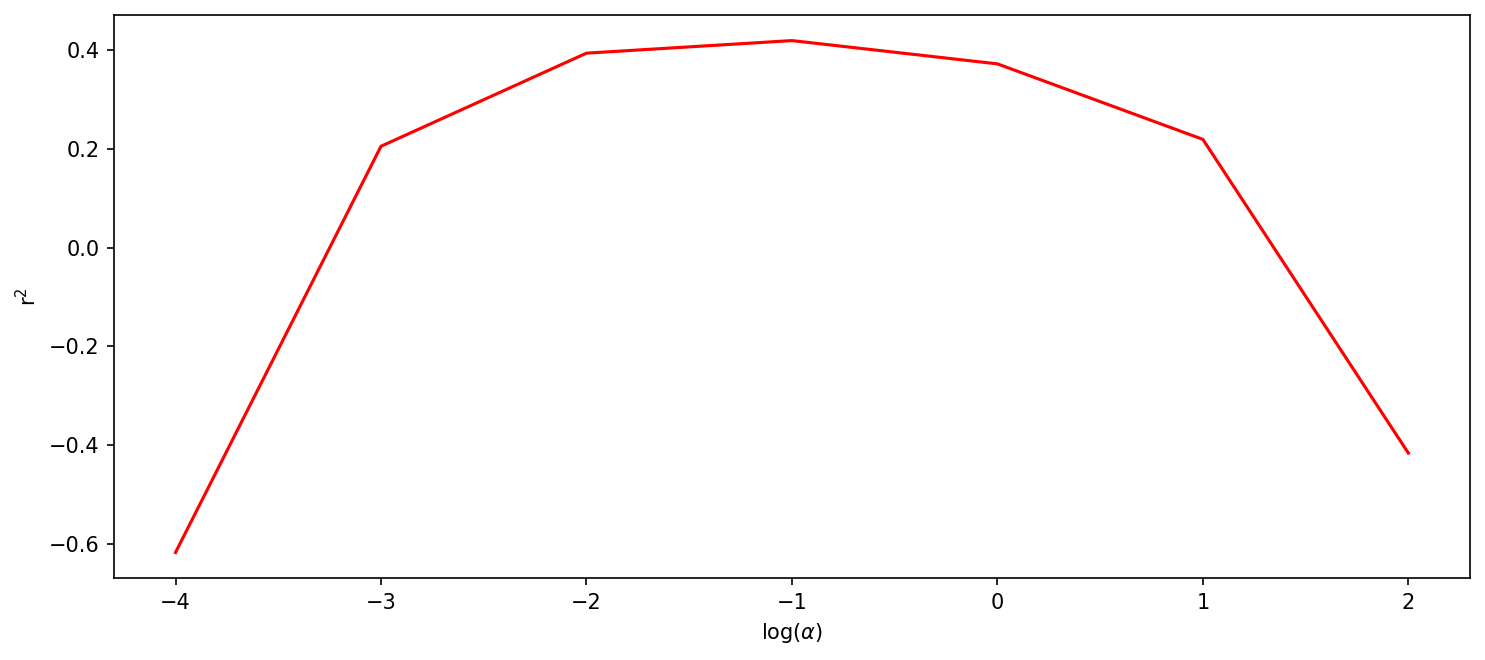

In [7]:
########################################

fig, ax = plt.subplots(figsize = (10, 4.5), dpi = 150)

ax.plot(np.log10(alphas), r2s, 'r-')
ax.set_xlabel(r'log($\alpha$)')
ax.set_ylabel('$\mathrm{r^2}$')

plt.tight_layout()

########################################

Which side of the plot corresponds to "overfitting" and which side corresponds to "underfitting"? (5 pts)

**Answer**

Underfitting occurs as $\alpha$ gets bigger. Therefore, the right side corresponds to underfitting and its opposite side corresponds to overfitting.

### 1b: GridSearchCV (25 pts)

In this problem you will optimize a kernel ridge regression model using `GridSearchCV`. The following are the requirements for full credit:

* You must evaluate the model on a **validation** set that is not used in training or hyperparameter optimization. The validation set should contain 50% of the original data, and should be selected using `train_test_split` with `random_state=121321`. (5pts)
* You should test at least 5 different options for both `alpha` and `gamma`. You should use 3-fold cross-validation to optimize the hyperparameters. The optimized hyperparameters should give the higheset $\mathrm{r^2}$ on the **test** set since the validation set cannot be used to select hyperparameters. (5pts)
* You should show that the optimal model achieves an $\mathrm{r^2}$ score of at least 0.42 on the **validation** set. (5pts)
* You should include a parity plot that shows the training/testing data as red points, validation data as blue points, and a black "parity" line where the model equals the data. (5pts)

First, set up the validation set. Save it as `X_val` and `y_val`. This data should only be used to evaluate the final model. (5 pts)

In [8]:
########################################

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .5, random_state = 121321)

########################################

In [9]:
assert np.isclose(np.dot(np.dot(X_val.T/X_val.shape[0], y_val/y_val.shape[0]).T, np.dot(X_val.T/X_val.shape[0], y_val/y_val.shape[0])), 21.9646345), "Data split is not correct. If you cannot pass the assertion for any reason, please define a validation set using your best judgement and proceed with the rest of the problem."

Next, write the code to use `GridSearchCV` to identify the optimal hyperparameters. Print out the $\mathrm{r^2}$ score on the validation set at the end of the code block. (10 pts)

**Note:** This block may take up to a minute to run, so you may want to test it with just a few hyperparameter options to debug your code.

In [10]:
########################################

from sklearn.model_selection import GridSearchCV
alphas = np.logspace(-3, 1, 5)
gammas = np.logspace(-4, 0, 5)

params = {'alpha': alphas, 'gamma': gammas}

gcv = GridSearchCV(krr, params, cv = 3)
gcv.fit(X_train, y_train)

print('r2 on the validation set: {}'.format(gcv.best_estimator_.score(X_val, y_val)))

########################################

r2 on the validation set: 0.4362594030869673


Finally, write the code to make the parity plot. Plot the model predictions along the x-axis and the actual data along the y-axis. (5 pts)

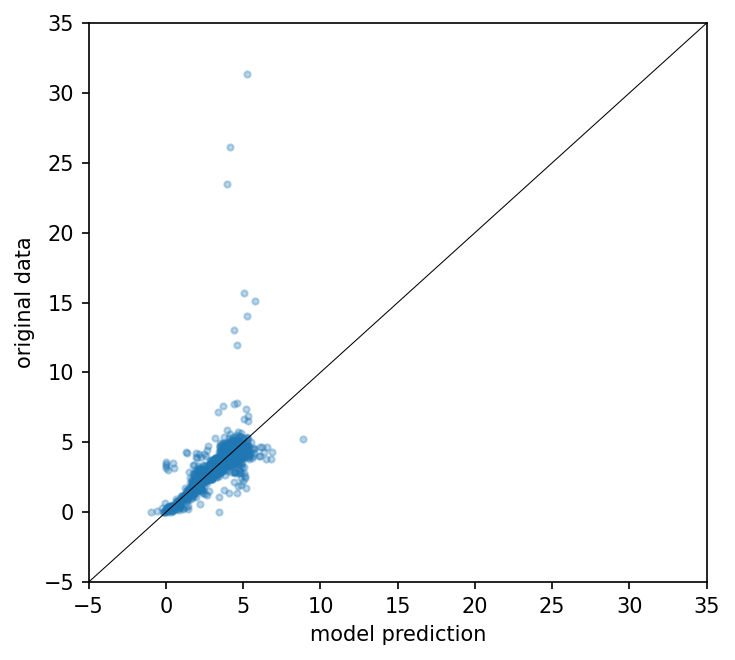

In [11]:
########################################

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)

ax.scatter(gcv.best_estimator_.predict(X_val), y_val, marker = '.', alpha = .3)
ax.plot([-5, 35], [-5, 35], 'k-', lw = 0.5)
ax.set_xlabel('model prediction')
ax.set_ylabel('original data')
ax.set_xlim([-5, 35])
ax.set_ylim([-5, 35])
plt.tight_layout()

########################################

Do you think that $\mathrm{r^2}$ is a good metric for this model? If not, provide an alternative metric that might be more appropriate and briefly explain. (5 pts)

**Answer**

Perhaps no. Our prediction has a few severe outliers in which case $\mathrm{r^2}$ will be heavily sensitive to those outliers. Mean absolute error (MAE) could be a better alternative since it is more robust to outliers. However, keep in mind that, in some cases, MAE may not provide reference points for assessing whether the prediction is good or not (i.e. we easily know that the model is better as $\mathrm{r^2}$ gets closer to 1.0 whereas we cannot determine how good enough the model is with MAE alone).

## Problem 2: Dimensional Reduction (70 pts)

### Loading data

In this problem you will work with the MNIST "digits" dataset from scikit-learn. The following block loads the dataset and assigns `X_mnist` and `y_mnist` arrays.

In [12]:
from sklearn.datasets import load_digits

digits = load_digits()
X_mnist = np.array(digits.data)
y_mnist = np.array(digits.target)

The function below is a useful way to visualize a datapoint in the MNIST dataset.

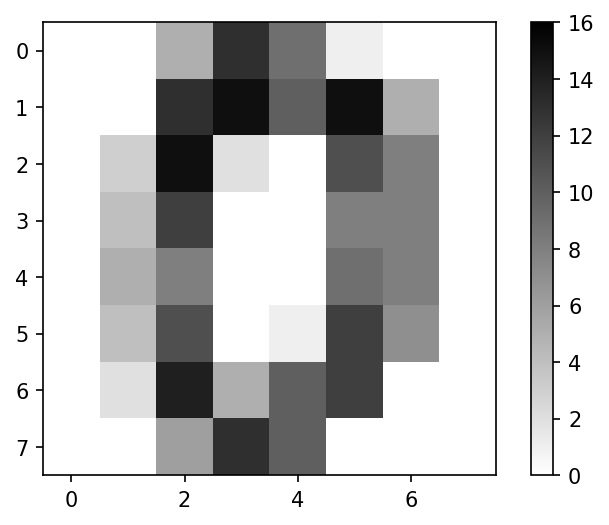

In [13]:
def show_image(digit_data, n=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(dpi = 150)
    if n is None: #assume input is a single image
        n = 0
        digit_data = [digit_data]
    img = digit_data[n].reshape(8,8)
    colormap = ax.imshow(img, cmap='binary', vmin=0, vmax=16)
    ax.get_figure().colorbar(colormap, ax=ax)
    
# test the function:

show_image(X_mnist, 0)

### 2a: Low-dimensional projection (35 pts)

In this problem, you will use PCA to project the MNIST data onto lower dimensional spaces. First, use a scree plot (or any other method you want) to determine the minimum number of dimensions required to retain 90% of the variance in the MNIST dataset. Save the number as `n_90`. (15 pts)

In [14]:
########################################

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_mnist)

b = np.cumsum(pca.explained_variance_ratio_)
n_90 = b[b<.90].shape[0] + 1

########################################

In [15]:
assert hash(n_90/2.) == 1152921504606846986, "Incorrect number of components"

Next, project the MNIST data onto 2 dimensions and visualize it by color-coding each point by it's corresponding label. (10 pts)

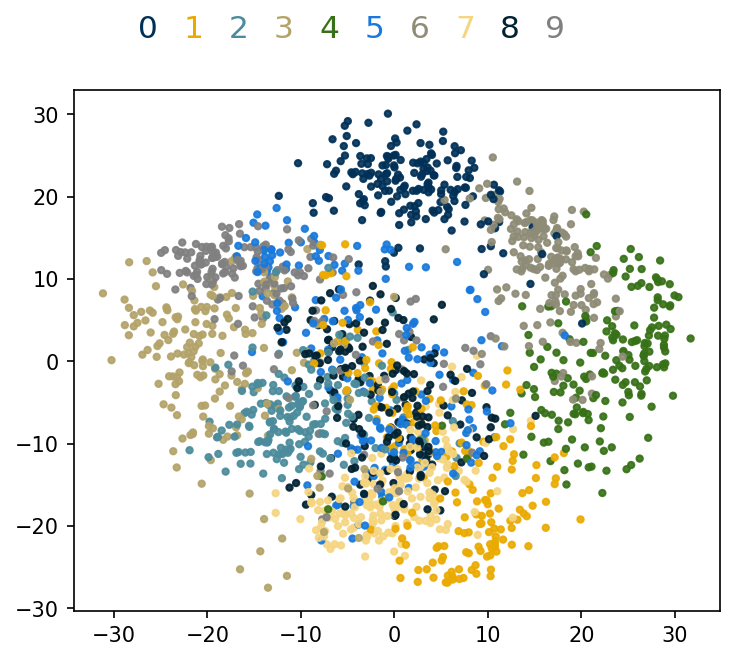

In [16]:
########################################

X_pca = pca.transform(X_mnist)

clrs = np.array(['#003057', '#EAAA00', '#4B8B9B', '#B3A369', '#377117', '#1879DB', '#8E8B76', '#F5D580', '#002233', '#808080'])

def add_labels(ax, colors = clrs):
    xpos = 0.1
    for label in range(0, 10):
        c = colors[label]
        ax.annotate(str(label), xy = [xpos, 1.1], xycoords = 'axes fraction', color = c, size = 15)
        xpos += 0.07

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha = .9, marker = '.', c = clrs[y_mnist])
add_labels(ax = ax)
plt.tight_layout()

########################################

Use the `show_image` function to visualize the first principal component vector. Multiply the vector by 64 to increase its visibility. (5 pts)

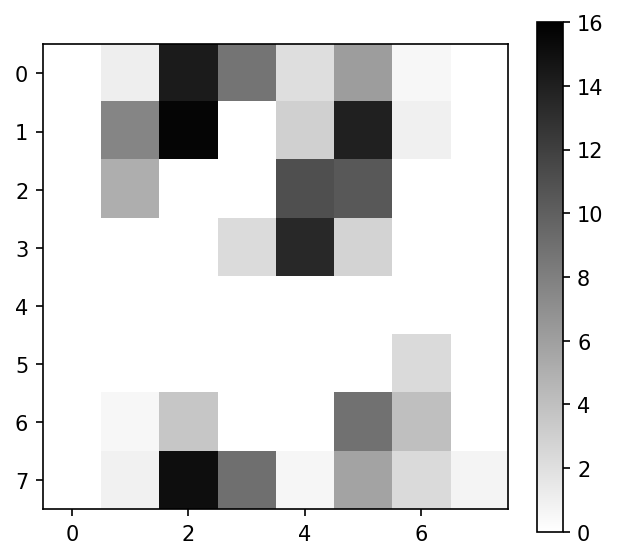

In [17]:
########################################

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
show_image(-pca.components_ * 64, 0, ax = ax)

########################################

Based on the visualization of the vector and/or the projection onto the first two principal components, which digit has the largest projection onto the first principal component direction? (5 pts)

**Answer**

**2** or **3** has the largest projection onto the first principal component direction.

### 2b: Reconstructing high-dimensional vectors (35 pts)

In this problem you will take advantage of the fact that PCA is "invertable" to explore how much information is lost during dimensional reduction. Start by projecting the MNIST data in `X_mnist` onto the first 2 principal components and selecting the digit at index 7. Save the resulting vector as `MNIST_7_2d`. (5 pts)

In [18]:
########################################

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_mnist)
MNIST_7_2d = X_pca[7]

########################################

In [19]:
assert np.isclose(np.linalg.norm(MNIST_7_2d), 21.277523095877758), "Wrong digit and/or dimension selected"

Next, invert the transformation to re-construct the 7th image from it. Save the result as `MNIST_7_reconstructed`. Use the `show_image` function to visualize the re-construction, and compare it to the original image. (5 pts for reconstruction, 5 pts for plot)

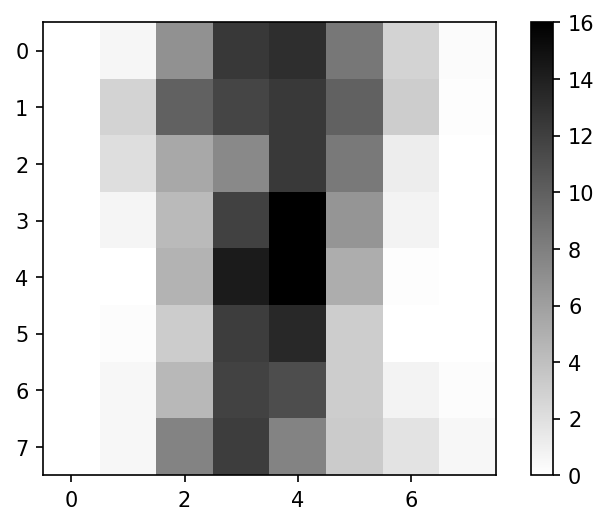

In [20]:
########################################

MNIST_7_reconstructed = pca.inverse_transform(MNIST_7_2d.reshape(1, 2))
show_image(MNIST_7_reconstructed, 0)

########################################

In [21]:
assert np.isclose(np.linalg.norm(MNIST_7_reconstructed), 56.26218631788201), "Reconstruction is not correct"

Follow the same process to project the 7th image onto the first 5, 10, 25, and 45 principal components. Visualize each of the resulting reconstructions. Images should be plotted in increasing order of the number of principal components. (10 pts)

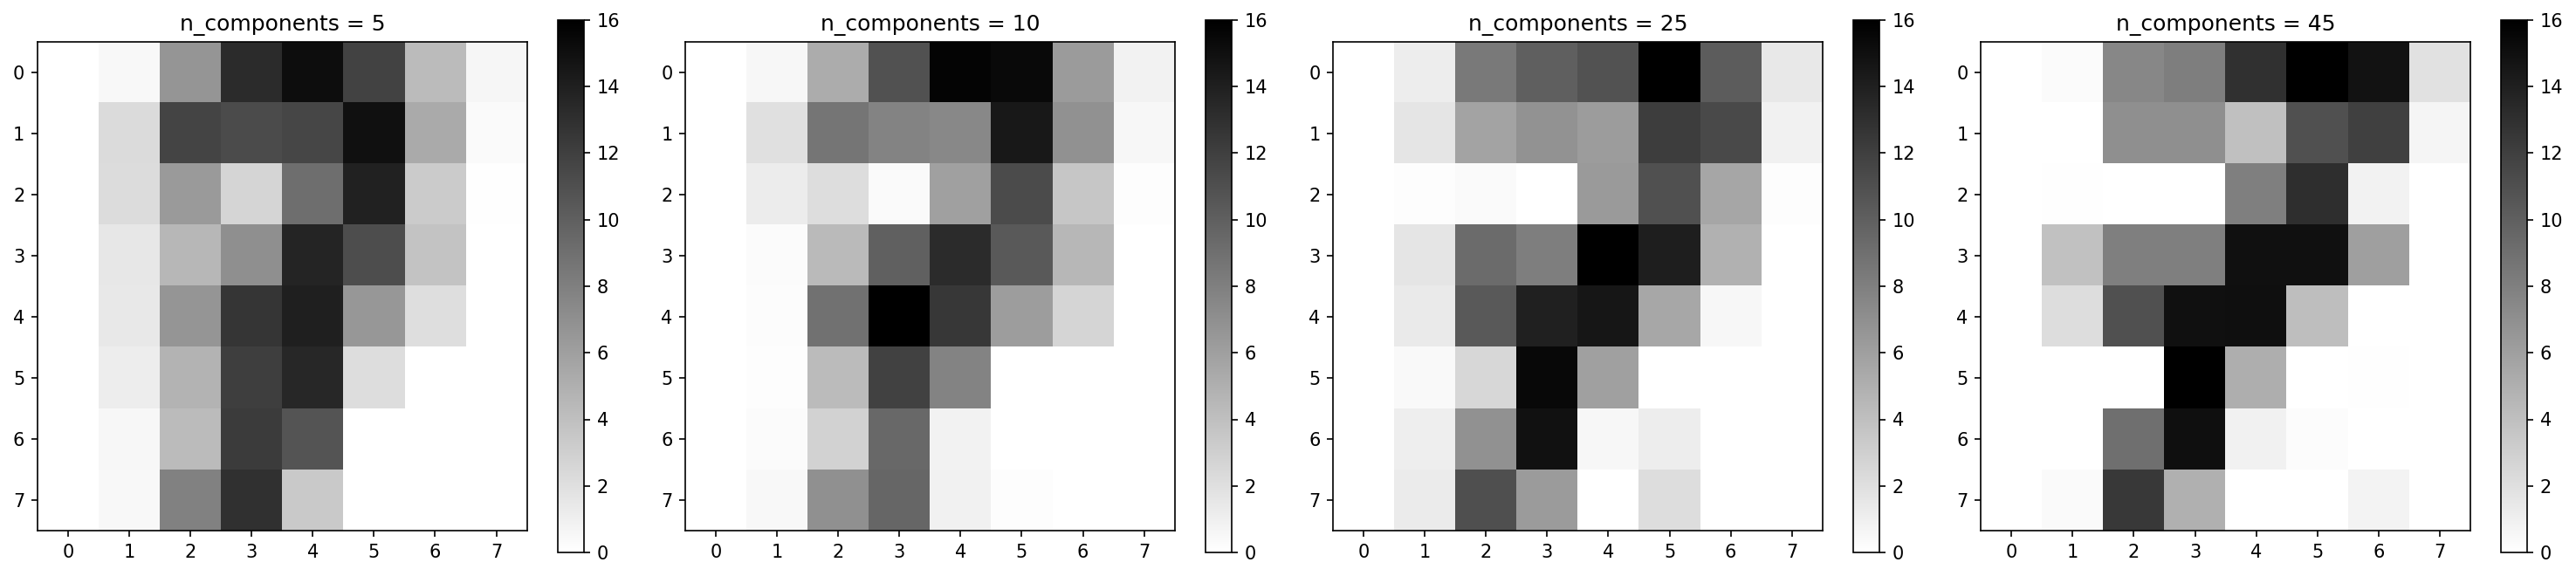

In [22]:
########################################

comp = [5, 10, 25, 45]
fig, axes = plt.subplots(1, 4, figsize = (20, 4.5), dpi = 150)

for i, c in enumerate(comp):
    pca = PCA(n_components = c)
    X_pca = pca.fit_transform(X_mnist)
    
    reconstruct = pca.inverse_transform(X_pca[7])
    show_image(reconstruct.reshape(1, -1), 0, ax = axes[i])
    axes[i].set_title('n_components = {}'.format(c))

plt.tight_layout()

########################################

Finally, you will create artificial digits that do not exist in the original MNIST set. Assume that each of the following vectors are 10-dimensional representations of digits. Reconstruct and visualize an 8x8 image for each one, and assign the **reconstructed vector to the variable name associated with the vector** (i.e. `fake_3` should be a 64-dimensional vector that is reconstructed from the associated 10-dimensional vector below):

* `fake_3` : `[-15.9,   3.3,   9.8, -12.3,   7.0,   1.1,  -1.0,  11.0,  -3.25,   6.5]`
* `fake_9` : `[ -5.5,   8.0,  -5.0,  -2.5,   3.3,  -0.8,  -4.5,   6.9,   6.5, -12.5]`
* `fake_0` : `[-1.25, 21.3, -9.5, 13.0, -7.1, -7.5,  3.25,  2.5, -0.6,  3.6]`
* `random` : `[7.22, 6.06, 0.03, 5.98, 4.5,  9.35, 5.25, 6.89, 1.91, 7.97]`

(5 pts for reconstruction, 5 pts for plot)

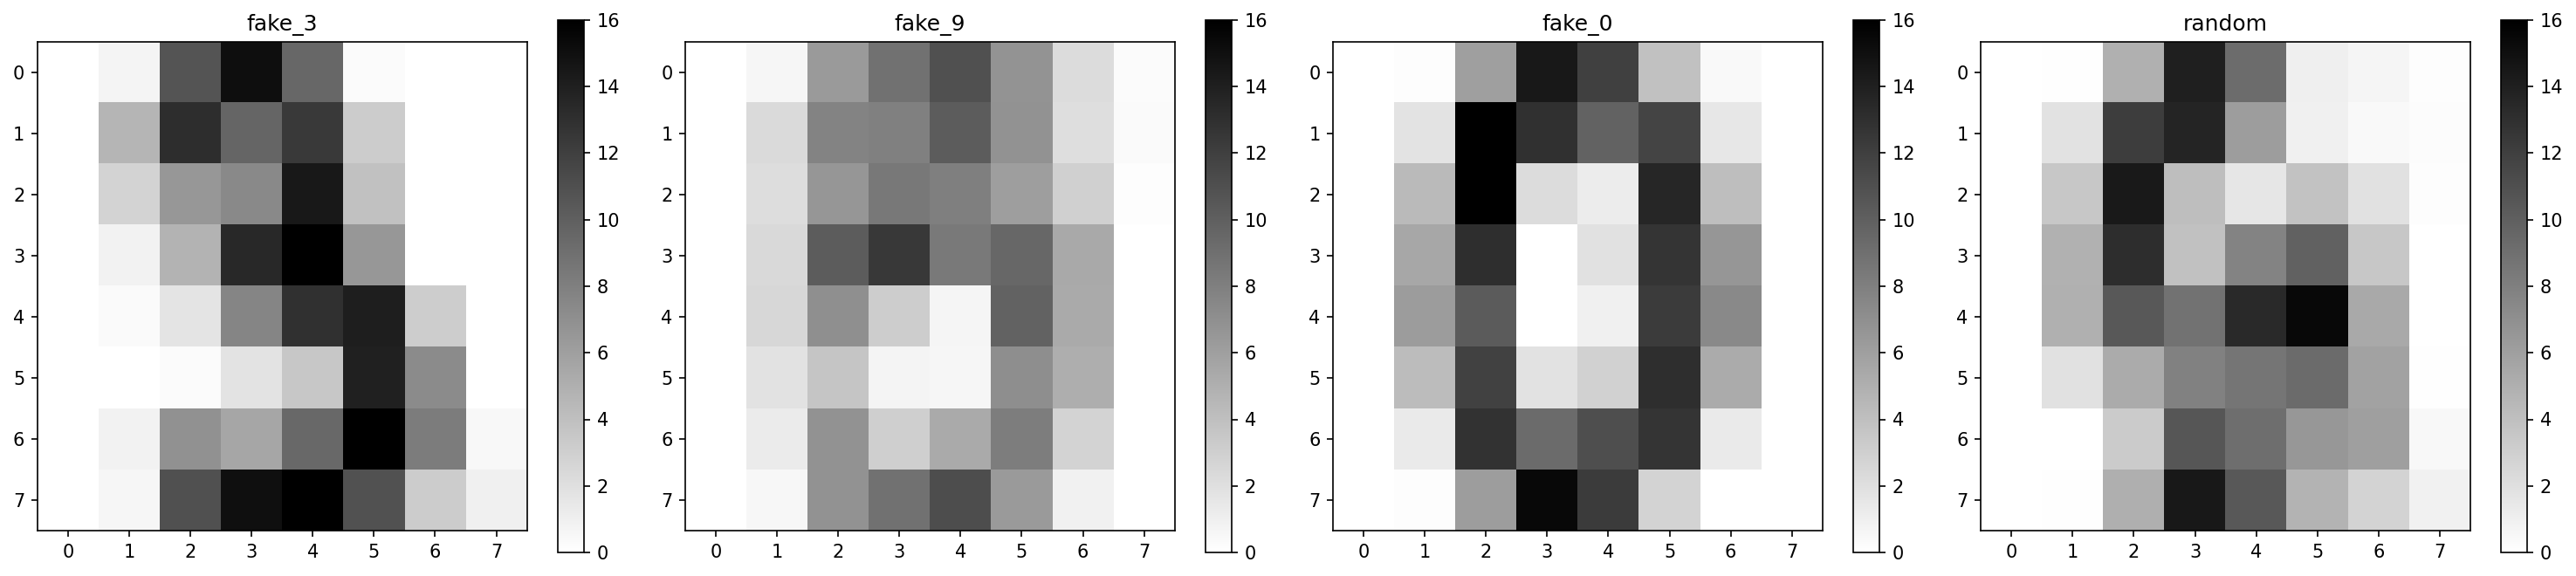

In [23]:
########################################

fake_3 = [-15.9,   3.3,   9.8, -12.3,   7.0,   1.1,  -1.0,  11.0,  -3.25,   6.5]
fake_9 = [ -5.5,   8.0,  -5.0,  -2.5,   3.3,  -0.8,  -4.5,   6.9,   6.5, -12.5]
fake_0 = [-1.25, 21.3, -9.5, 13.0, -7.1, -7.5,  3.25,  2.5, -0.6,  3.6]
random = [7.22, 6.06, 0.03, 5.98, 4.5,  9.35, 5.25, 6.89, 1.91, 7.97]

pca = PCA(n_components = 10)
pca.fit(X_mnist)

fake = [fake_3, fake_9, fake_0, random]
name = ['fake_3', 'fake_9', 'fake_0', 'random']
recons = []

fig, axes = plt.subplots(1, 4, figsize = (20, 4.5), dpi = 150)

for i, f in enumerate(fake):
    recon = pca.inverse_transform(np.array(f).reshape(1, -1))
    recons.append(recon)
    show_image(recon, 0, ax = axes[i])
    axes[i].set_title('{}'.format(name[i]))

plt.tight_layout()
    
fake_3 = recons[0]
fake_9 = recons[1]
fake_0 = recons[2]
random = recons[3]

########################################

In [24]:
dot_1 = fake_3.reshape(-1,) @ fake_9.reshape(-1,)
dot_2 = fake_0.reshape(-1,) @ random.reshape(-1,)

dot_1-dot_2

-468.2158449095473

In [25]:
dot_1 = fake_3.reshape(-1,) @ fake_9.reshape(-1,)
dot_2 = fake_0.reshape(-1,) @ random.reshape(-1,)

assert np.isclose(dot_1 - dot_2, 758.0865881737889)

AssertionError: 

## Problem 3: Clustering (35 pts)

In this problem, you will implement the k-means algorithm with several functions provided below.

In [26]:
def dist(pt1, pt2):
    return np.sqrt(sum([(xi - yi)**2 for xi, yi in zip(pt1, pt2)]))

def expected_assignment(pt, cluster_centers):
    dists = [dist(pt, ci) for ci in cluster_centers]
    min_index = dists.index(min(dists))
    return min_index

def new_centers(cluster_points, centers):
    centers = list(centers)
    for i, ci in enumerate(cluster_points):
        if ci != []:
            centers[i] = np.mean(ci, axis = 0)
    return centers

You will apply the algorithm to a 2-dimensional projection of the "impurity" dataset from **Problem 1** (with only every 5th point to reduce computation time). The following code block defines and visualizes this dataset.

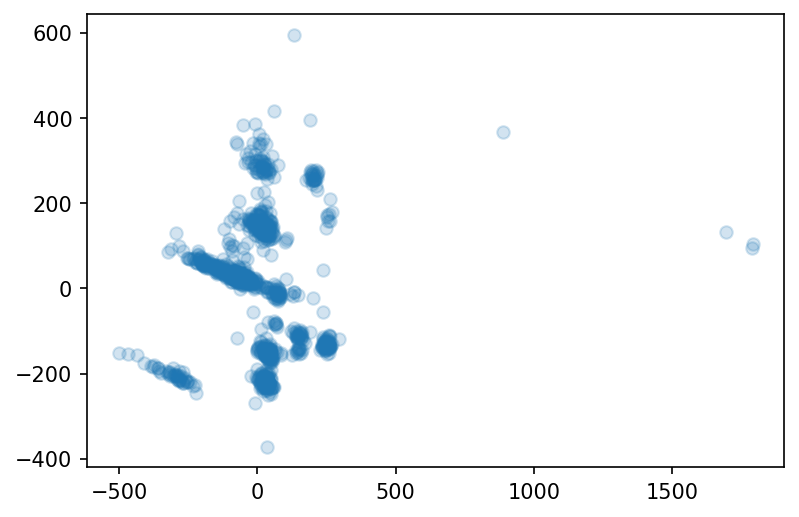

In [27]:
from sklearn.decomposition import PCA

df = pd.read_csv('impurity_dataset.csv')

def is_real_and_finite(x):
    try:
        x = float(x)
    except ValueError:
        return False
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

all_data = df[df.columns[1:]].values #drop the first column (date)
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis=1).copy().values #True if all values in a row are real numbers
X = np.array(all_data[real_rows,:-5], dtype='float') #drop the last 5 cols that are not inputs

pca = PCA(n_components = 2)
X_2d = pca.fit_transform(X)[::5]
fig, ax = plt.subplots(dpi = 150)
ax.scatter(X_2d[:,0], X_2d[:,1], alpha = .2);

### 3a: Custom-coded k-means (15 pts)

In this problem, you will define a function `kmeans` that implements the k-means alogrithm until the pre-defined convergence criterion is satistified. The `kmeans` function takes the following arguments:

- `X`: dataset (numpy array)
- `centers`: initial guesses for cluster centers (numpy array)

Note that the number of clusters will be implicitly defined by the number of rows in the `centers` array.

**Convergence criterion**: the cluster assignment does not change between iterations (e.g. the `clusters` output is the same as the prior iteration). Other convergence criteria that pass the assertion will be given partial credit.

Your `kmeans` function should return `new_center` (numpy array) and `clusters` (list of lists with the indices of the points in each cluster). (10 pts)

In [28]:
def kmeans(X, centers):
########################################

    old_center = np.array(centers)
    max_dist = 1e6
    
    while max_dist > 0:
        clusters = []
        for i in range(old_center.shape[0]):
            clusters.append([])
            
        for pt in X:
            cluster_idx = expected_assignment(pt, old_center)
            clusters[cluster_idx].append(pt)
            
        new_center = new_centers(clusters, old_center)
        
        max_dist = 0
        for i in range(old_center.shape[0]):
            dist = np.linalg.norm(old_center[i] - new_center[i])
            if max_dist < dist:
                max_dist = dist
                
        old_center = np.array(new_center)
        
########################################
    return np.array(new_center), clusters

In [29]:
centers, clusters = kmeans(X_2d, [[0,0], [10,600], [-5,-250]])
assert np.isclose(np.linalg.norm(centers), 291.2018667375927), "Incorrect centers identified by kmeans function."

Apply your custom-coded `kmeans` function to the `X_2d` dataset. Using the following initial guess for the cluster centers:

`initial_guesses = [[0,-220],[0,-175],[0,0],[0,150],[0,400],[-400,-200],[100,-150],[200,-150],[200,200],[1500,0]]`

Plot the result of clustering by color-coding the points. Locate the cluster centers using \* markers (`marker = '*'`). (5 pts)

**Note:** You may also use the `KMeans` function from `scikit-learn` for this problem if you could not finish the prior problem.

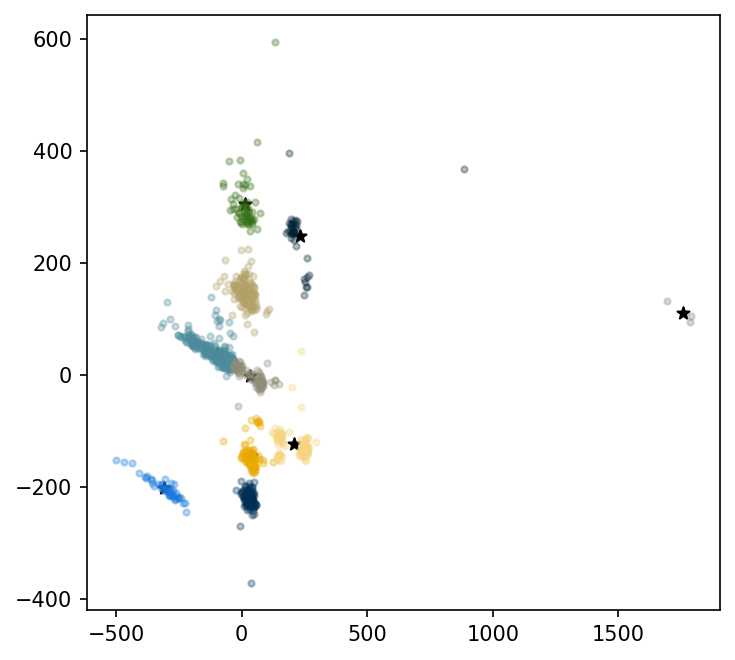

In [30]:
initial_guesses = [[0,-220],[0,-175],[0,0],[0,150],[0,400],[-400,-200],[100,-150],[200,-150],[200,200],[1500,0]]

########################################

centers, clusters = kmeans(X_2d, initial_guesses)

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)

for i, ci in enumerate(clusters):
    for pt in ci:
        ax.plot(pt[0], pt[1], marker = '.', alpha = .3, color = clrs[i])
        
ax.scatter(centers[:, 0], centers[:, 1], marker = '*', color = 'k')
plt.tight_layout()

########################################

### 3b: Silhouette scores (10 pts)

Use the `KMeans` implementation in `scikit-learn` with `random_state=121321` and default initialization to calculate the silhouette score as a function of the number of clusters from 2 to 15. Save the number of clusters that gives the best silhouette score as `k_opt` and the corresponding silhouette score as `s_opt`. 

In [31]:
########################################

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

s_opt = 0

for i in range(2, 16):
    kmeans = KMeans(n_clusters = i, random_state = 121321)
    y_predict = kmeans.fit_predict(X_2d)
    
    s = silhouette_score(X_2d, y_predict)
    
    if s > s_opt:
        s_opt = s
        k_opt = i

########################################

In [32]:
assert np.isclose(k_opt*s_opt, 8.587542454267634)

### 3c: Visualization and analysis of kmeans (10 pts)

Visualize the results of kmeans clustering with the optimal number of clusters you determined above as a scatter plot. Use the labels of the predicted clusters to color-code the points. (5 pts)

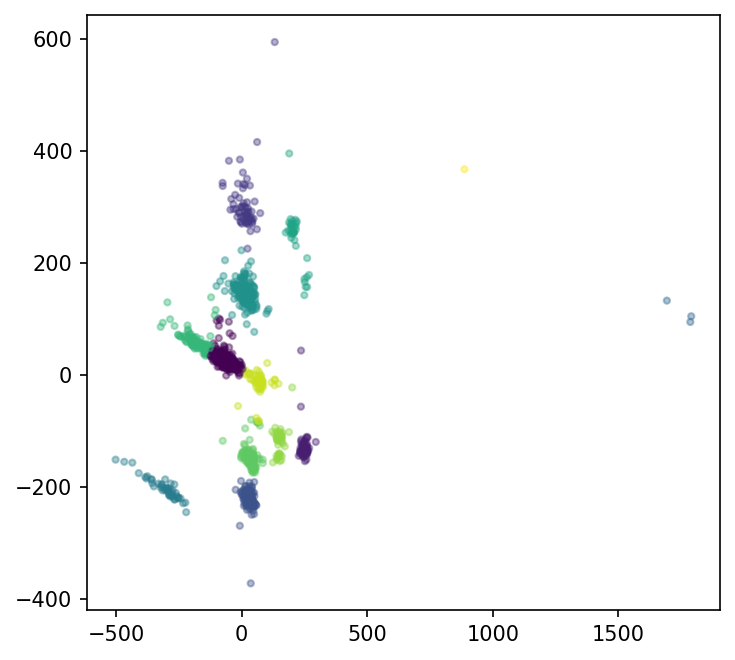

In [33]:
########################################

kmeans = KMeans(n_clusters = k_opt, random_state = 121321)
y_predict = kmeans.fit_predict(X_2d)

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
ax.scatter(X_2d[:, 0], X_2d[:, 1], c = y_predict, marker = '.', alpha = .4)

plt.tight_layout()

########################################

Do you think k-means is the best clustering model for this dataset? If not, suggest an alternative method. Justify your answer in terms of the assumptions that underlie each method. (5 pts)

**Answer**

No. The main assumption of k-means clustering is that the clusters are roughly spherical and shares the same variance across the components. However, this is obviously not the case for this dataset. Instead, density-based methods, such as mean shift algorithm or DBSCAN, may work better.

## Problem 4: Supervised Dimensional Reduction (40 pts)

### Loading data

In this problem you will work with the MNIST "digits" dataset from scikit-learn again. The following block will re-load the dataset and assign `X_mnist` and `y_mnist` arrays.

In [34]:
from sklearn.datasets import load_digits

digits = load_digits()
X_mnist = np.array(digits.data)
y_mnist = np.array(digits.target)

In this problem, you will use the following split to define a validation set. **The validation set should not be used to train models at any point.**

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_mnist, y_mnist, test_size=0.3, random_state=121321)

### 4a: Linear Discriminant Analysis (15 pts)

Come up with `X_lda` which is a matrix of transformed features from the training data, `X_train`, using LDA. Use the maximum possible number of LDA features for this dataset, and leave all other settings of the `LinearDiscriminantAnalysis` object at their default values. (10pts)

In [36]:
########################################

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, y_train)

########################################

In [37]:
assert hash(X_lda.shape[1]/2.) == 1152921504606846980, "Incorrect number of features"
assert np.isclose(np.linalg.norm(X_lda), 213.0153953966812), "Incorrect LDA project"

Visualize the projection of the training data onto the first 2 LDA vectors. Color-code the points based on their original labels. (5 pts)

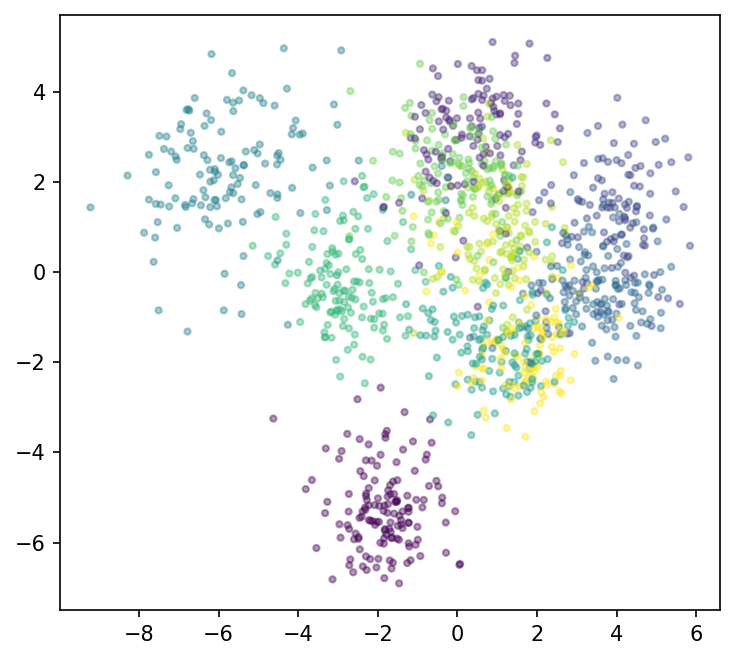

In [38]:
########################################

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)

ax.scatter(X_lda[:, 0], X_lda[:, 1], c = y_train, alpha = .4, marker = '.')
plt.tight_layout()

########################################

### 4b: LDA model evaluation (10 pts)

Use the LDA model to predict the labels of the **validation** set. Plot the results as a confusion matrix. (5 pts)

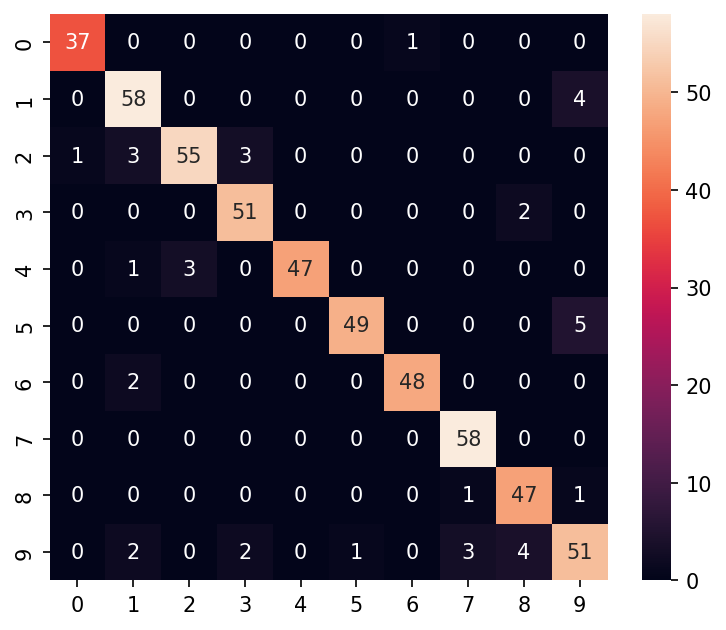

In [39]:
########################################

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_val_predict = lda.predict(X_val)

cm = confusion_matrix(y_val, y_val_predict)
fig, ax = plt.subplots(figsize = (6, 5), dpi = 150)

sns.heatmap(cm, annot = True, fmt = 'd', ax = ax);

########################################

The `score` method of the LDA object calculates the "subset accuracy" of the model for a multi-class classification problem. Use this method to calculate the subset accuracy on the validation set. Save the result as `LDA_score`. (5 pts)

In [40]:
########################################

LDA_score = lda.score(X_val, y_val)

########################################

In [41]:
assert hash(round(LDA_score, 3)) == 2139822312550308096, "Incorrect LDA score"

### 4c: Using LDA projections as features (15 pts)

In this problem you will construct a support vector classifier (SVC) model with the LDA projections as features. Use `C=1.0` and an RBF kernel with `gamma=0.005`. Train the model with the training data projected onto the maximum number of LDA dimensions and report the "subset accuracy" as determined by the `score` method **for the training set**. Save the result as `SVC_train_score`. (10pts)

In [42]:
########################################

from sklearn.svm import SVC

svc = SVC(kernel = 'rbf', C = 1.0, gamma = 0.005)
svc.fit(X_lda, y_train)
SVC_train_score = svc.score(X_lda, y_train)

########################################

In [43]:
assert hash(round(SVC_train_score, 3)) == 2248196933983351552, "Incorrect SVC train score"

Now use the model to predict the "subset accuracy" on the validation set. Save the result as `SVC_val_score`. (5 pts)

In [44]:
########################################

X_val_lda = lda.transform(X_val)
SVC_val_score = svc.score(X_val_lda, y_val)

########################################

In [45]:
assert hash(round(SVC_val_score, 3)) == 2190550858753009152, "Incorrect SVC validation score"